
# 1. Motivation 

Our dataset is retrieved from the world happiness report 2015 to 2019 questionaire from all over the world, due to the subjective nature of this data-set we've decided to focus more on intuitive visualization. 
This data-set raises the question of happiness, what it is and if possible how can we quantify it? Can it be "bought" ? 


 our initial goal was to aqquire external data from other sources to back the subjective data and find some kind of statistical correlation, such as wealth distribution and income inequality. We've aqquired the gini inequality index as we thought that such metric would be more accurate than GDP, since the GDP does not neccesarly translate into more wealth to the population of a nation or country, however we've han not been succesfull in finding some relevant insights.
 Our goal for the end user is both to raise awarness to the subjective well-being of other regions in the world.

# 2. Basic Stats

In [58]:
#Loading the dataset, and concatenating the Gini-coefficent 
#Maindata source: This data-set was sourced from world happiness-report,the data was initialy seperated for each year,
# but a lot of data cleaning and preperation was done in a seperate notebook.
# Gini-coffeicnt, population density source: World bank 

import pandas as pd
import numpy as np 
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("MainData.csv")
df = pd.read_csv("MainData.csv")
df1 = df[df["year"]<2020]
df1 = df1.drop("Unnamed: 0",axis=1)
df1["giniWB"] = df1["giniWB"]/100
df1["densityLog"] = np.log10(df1["density"])
df1["PopulationLog"] = np.log10(df1["Population"])

In [59]:
df1.head()

Country  Happines Score  Social support  Health (Life Expectancy)  \
0      Libya           5.754           1.119                     0.704   
1    Algeria           5.605           1.078                     0.618   
2  Mauritius           5.477           0.985                     0.710   
3    Nigeria           5.268           0.904                     0.160   
4     Zambia           5.129           0.916                     0.299   

   Trust (Government Corruption)  Generosity  Freedom  \
0                          0.110       0.183    0.417   
1                          0.174       0.078    0.286   
2                          0.075       0.377    0.561   
3                          0.040       0.272    0.343   
4                          0.125       0.196    0.488   

   Economy (GDP per Capita)  year    Population  density    hpe  giniWB  \
0                     1.131  2015   6192235.000    3.519    NaN     NaN   
1                     0.939  2015  39543154.000   16.603 42.000   0.276   
2                     1.008  2015   1262605.000  621.973 40.000   0.368   
3                     0.654  2015 183995785.000  202.022 38.000   0.351   
4                     0.470  2015  16248230.000   21.857 42.000   0.571   

   densityLog  PopulationLog  
0       0.546          6.792  
1       1.220          7.597  
2       2.794          6.101  
3       2.305          8.265  
4       1.340          7.211

In [60]:
#Let's set our theme for the plots for consistency 

import seaborn as sns
import matplotlib.pyplot as plt

custom_style = {
    "figure.figsize": (12, 7),
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "grid.color": "#e2e2e2",
    "axes.edgecolor": "#e2e2e2",
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "sans-serif"],
}

# Set the custom style
plt.style.use(custom_style)
# Save the style
plt.style.use(custom_style)
plt.savefig("custom_style.png", dpi=300, bbox_inches="tight")
    

<Figure size 864x504 with 0 Axes>

In [61]:
# Let's have a look at the top preformer in africa for the past years
top_5_by_year = df1.groupby('year').apply(lambda x: x.nlargest(5, 'Happines Score')[['Country', 'Happines Score']])
top_5_by_year

Country  Happines Score
year                               
2015 0        Libya           5.754
     1      Algeria           5.605
     2    Mauritius           5.477
     3      Nigeria           5.268
     4       Zambia           5.129
2016 40     Algeria           6.355
     41   Mauritius           5.648
     42       Libya           5.615
     43     Somalia           5.440
     44     Morocco           5.151
2017 79     Algeria           5.872
     80   Mauritius           5.629
     81       Libya           5.525
     82     Morocco           5.235
     83     Somalia           5.151
2018 120  Mauritius           5.891
     121      Libya           5.566
     122    Algeria           5.295
     123    Morocco           5.254
     124    Nigeria           5.155
2019 161  Mauritius           5.888
     162      Libya           5.525
     163    Nigeria           5.265
     164    Algeria           5.211
     165    Morocco           5.208

Interretsing enough, Libya has the highest score in 2015 and remains a top 5 for the rest of the years. And what's more interesting is somalia's 5'th place in 2017 in despite of ongoing civil war and economic crisis.

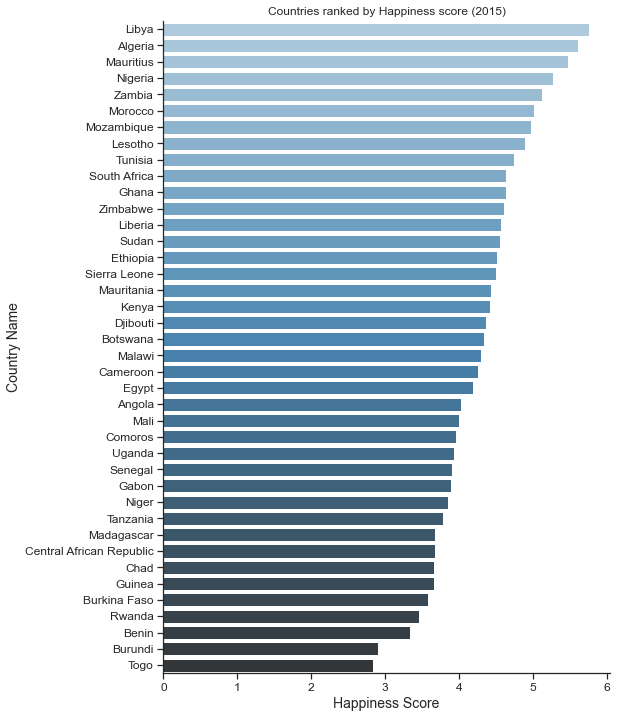

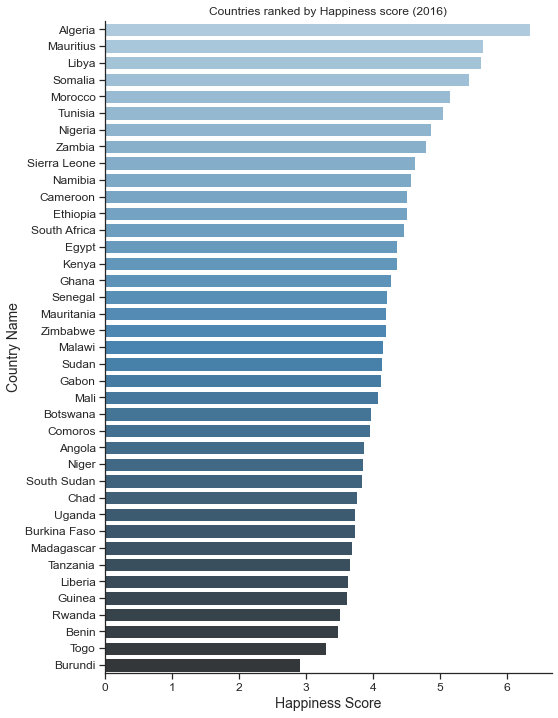

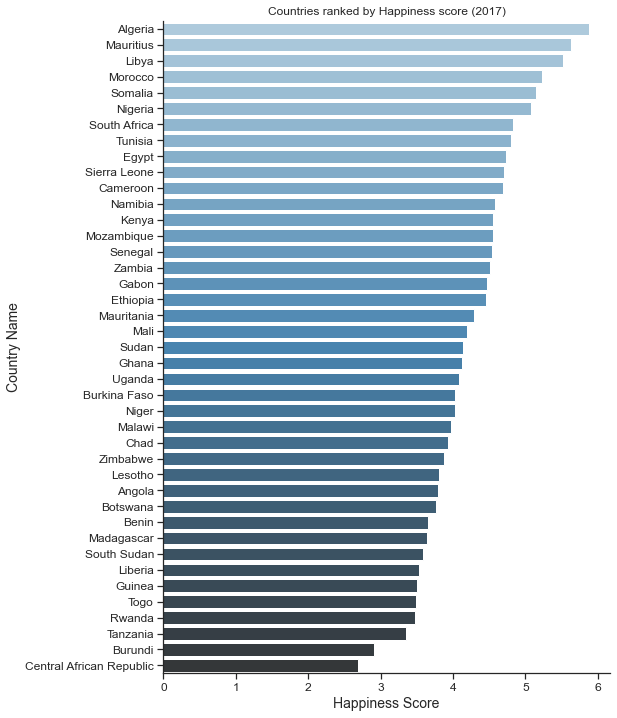

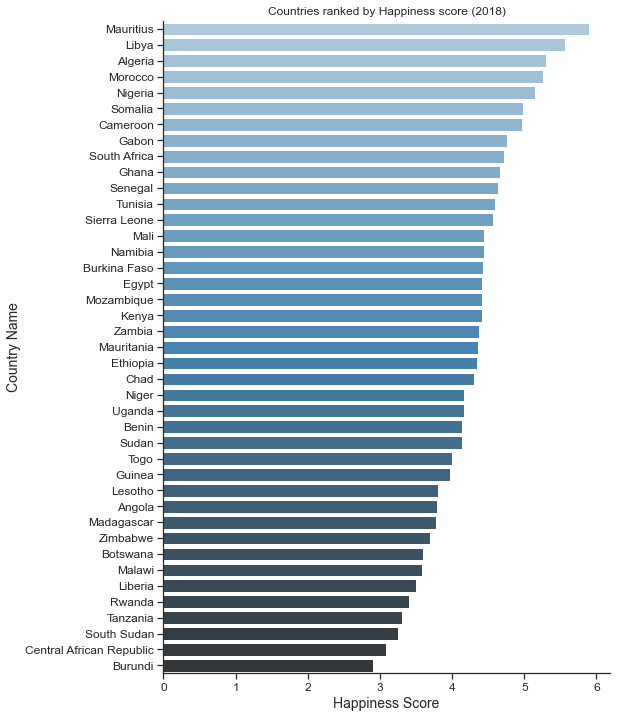

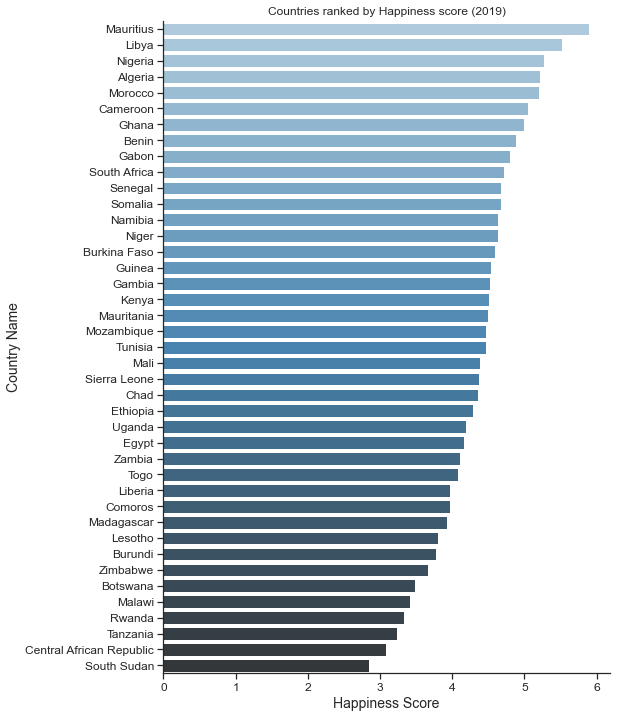

In [62]:
# Note : HPE stands for hours of work per employed person (per week)
%matplotlib inline
sns.set_style("whitegrid")
sns.set_style("ticks")

# Get a list of years in the dataset
years = df1['year'].unique()

# Loop through each year and create a plot
for year in years:
    # Filter the data for the current year
    df_year = df1[df1['year'] == year]
    
    # Sort the data by happiness score in descending order
    df_year_sorted = df_year.sort_values('Happines Score', ascending=False)
    
    # Plot the data for the current year
    plt.figure(figsize=(8, 12))
    ax = sns.barplot(y="Country", x="Happines Score", data=df_year_sorted, palette="Blues_d")
    ax.set(xlabel='Happiness Score', ylabel='Country Name')
    ax.set_title(f'Countries ranked by Happiness score ({year})')
    sns.despine()
    plt.show()


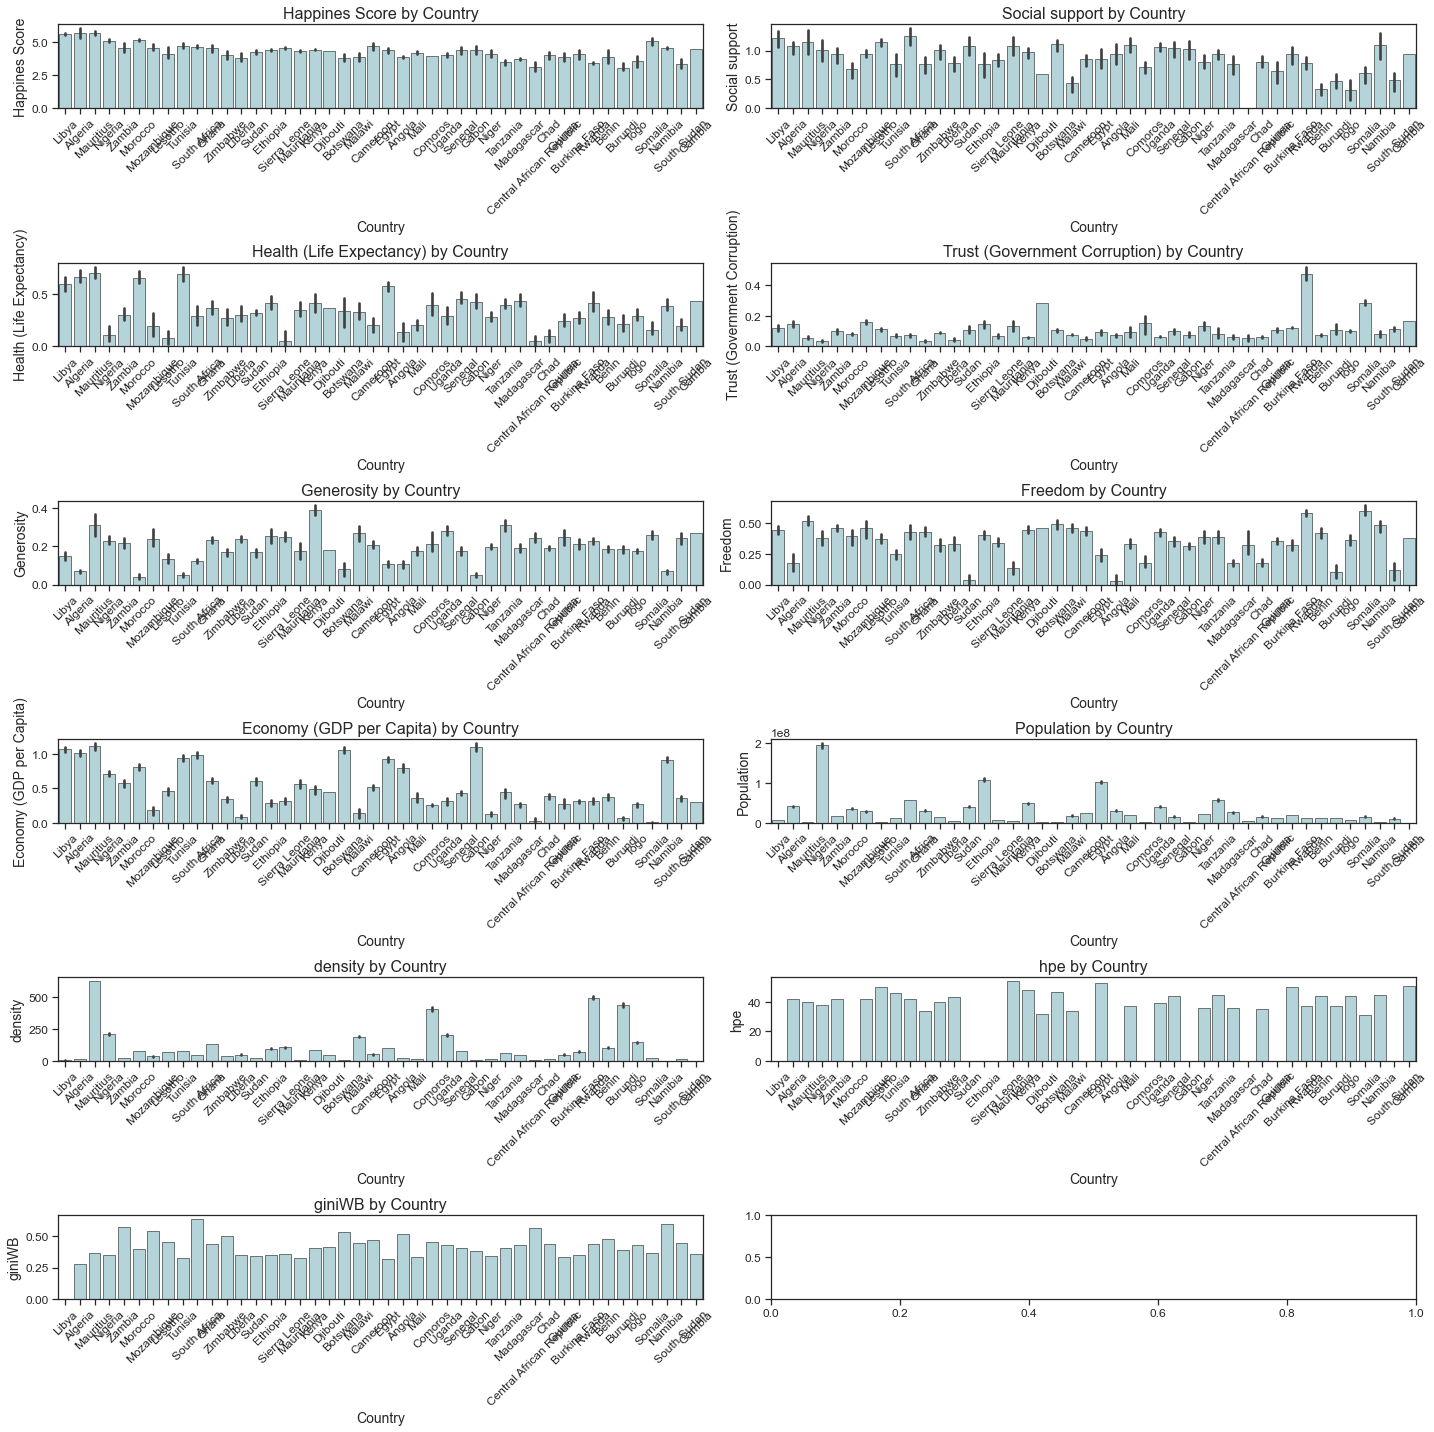

In [63]:
#we'll put the density and population to the logarithmic scale

attributes = ['Happines Score', 'Social support',
       'Health (Life Expectancy)', 'Trust (Government Corruption)',
       'Generosity', 'Freedom', 'Economy (GDP per Capita)',
       'Population', 'density', 'hpe', 'giniWB']

fig,ax = plt.subplots(6,2,figsize=(20,20))
ax = ax.flatten()

for i in range (len(attributes)):
    current_ax = ax[i]
    variable = attributes[i]
    df[variable]=pd.to_numeric(df[variable], errors="coerce")
    sns.barplot(ax=current_ax,y = variable,x="Country", linewidth=0.5, edgecolor="black",data=df1,color="#AED9E0")
    current_ax.set_ylabel(variable, fontsize=14)
    current_ax.set_title(variable+ " by Country", fontsize=16)
    current_ax.tick_params(axis='x', labelrotation=45)


plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()      

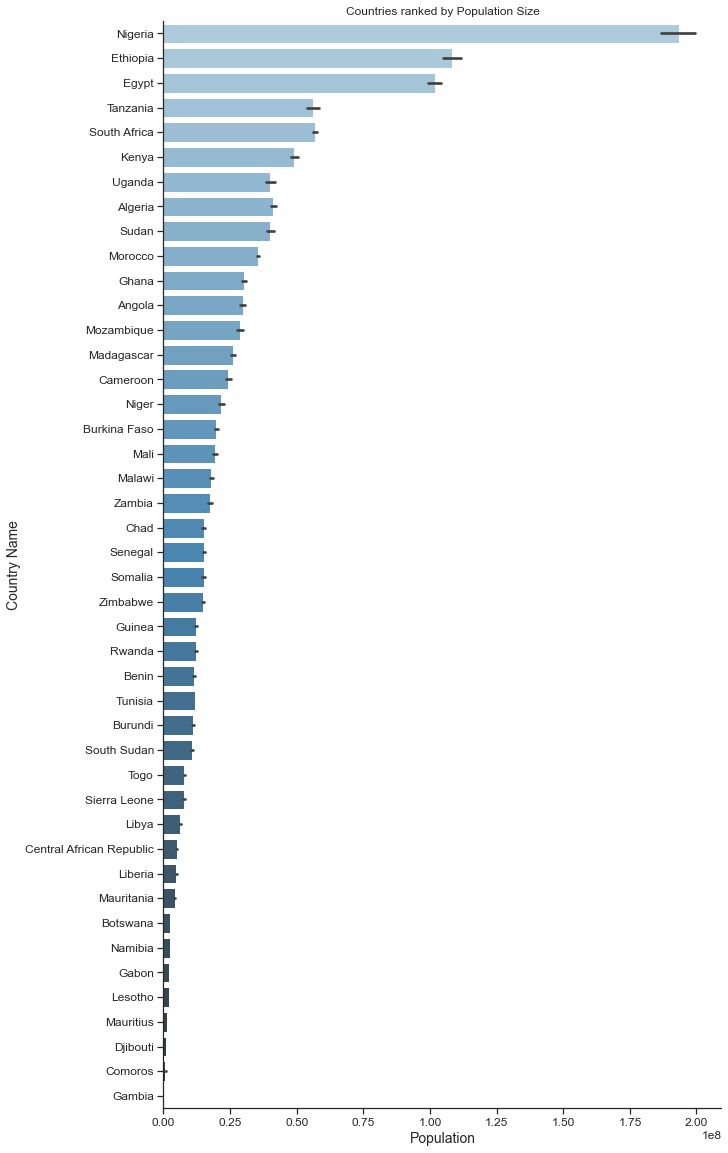

In [64]:
# Plot the results
%matplotlib inline
df_sorted = df1.sort_values('Population', ascending=False)

# Get a list of country names sorted by population size
countries_sorted = df_sorted['Country'].tolist()

# Plot the results in descending order
sns.set_style("whitegrid")
sns.set_style("ticks")
plt.figure(figsize=(10, 20))
ax = sns.barplot(y="Country", x="Population", data=df_sorted, palette="Blues_d", )
ax.set(xlabel='Population', ylabel='Country Name')
ax.set_title('Countries ranked by Population Size')
sns.despine()



# 3. Data analysis

Text(0.5, 1.0, 'Correlation heatmap')

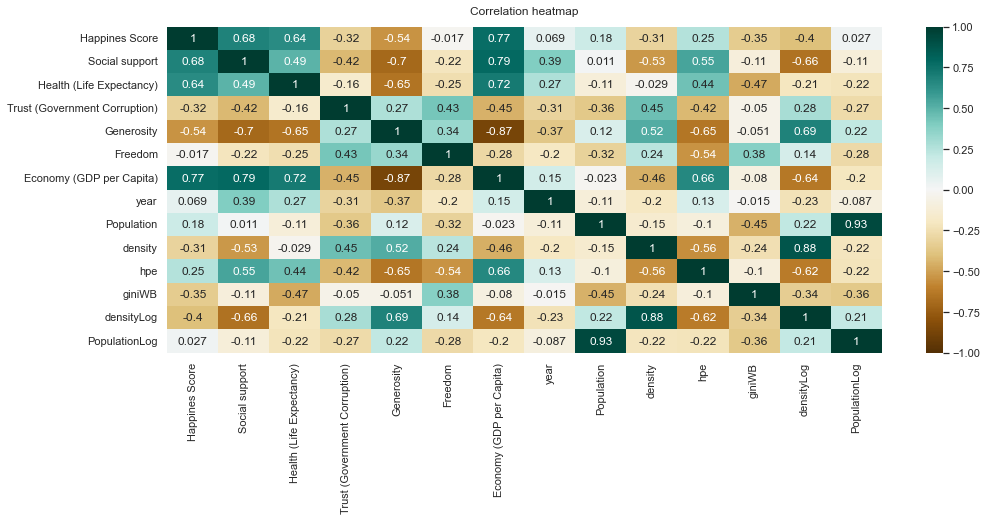

In [65]:
plt.figure(figsize=(16,6))
sns.set_theme()
corr_df = df1.corr()
heatmap = sns.heatmap(corr_df.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')
heatmap.set_title("Correlation heatmap",fontdict={'fontsize':12},pad=12)

In [66]:
#A good visualization to see the countries we are missing

import plotly.express as px
import json

# Load the GeoJSON file for Africa
with open('africa.geojson') as f:
    geojson_data = json.load(f)


min,max = df1["Happines Score"].min() ,df1["Happines Score"].max()



fig = px.choropleth_mapbox(df1, geojson=geojson_data, locations='Country', color='Happines Score',
                           color_continuous_scale="Viridis",
                           range_color=(min, max),     
                           featureidkey="properties.name", # set the key for the country name in the GeoJSON file
                           mapbox_style="carto-positron",
                           zoom=3, center = {"lat": 7.25, "lon": 21},
                           opacity=0.5,
                           labels={'Happines Score':'Happines Score'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()









> **Below is the snapshot of map plot generated by above code**
![Alt Text](https://i.imgur.com/vTSZNNi.jpeg)  

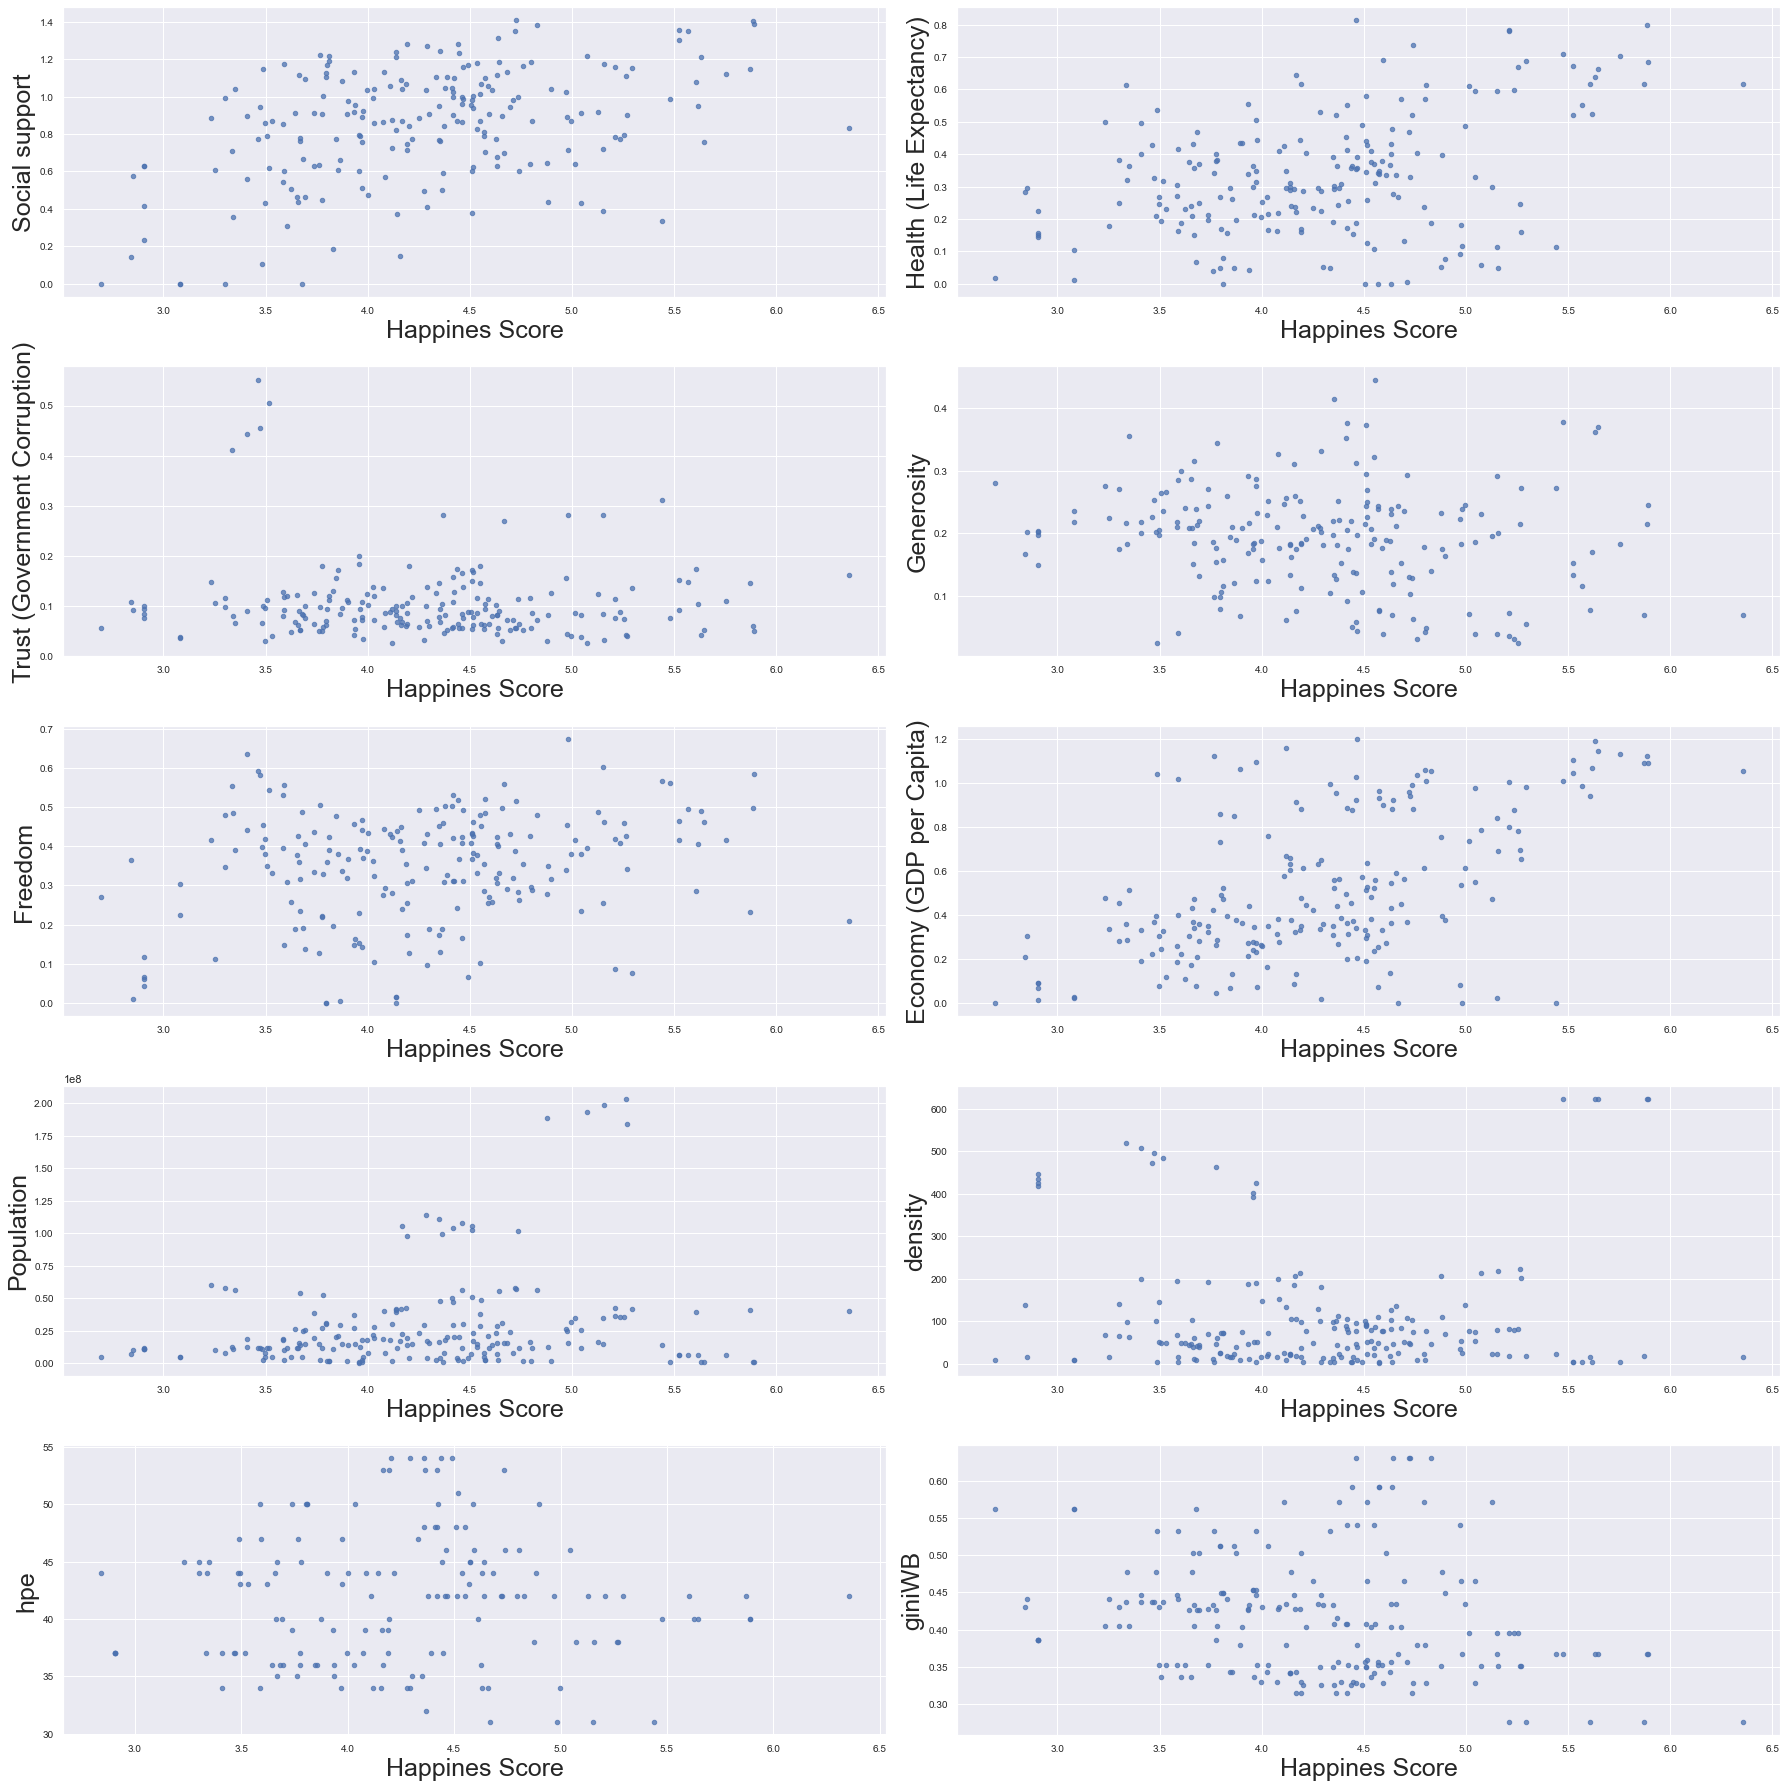

In [67]:
n = 0
fig,ax = plt.subplots(5,2,figsize=(25,25))
ax = ax.flatten()
m = -1

attributes = ['Social support',
       'Health (Life Expectancy)', 'Trust (Government Corruption)',
       'Generosity', 'Freedom', 'Economy (GDP per Capita)',
       'Population', 'density', 'hpe', 'giniWB']


at1 = df1["Happines Score"]
for index in range(len(attributes)):
    at2 = df1[attributes[index]]
    ax[index].scatter(x = at1, y= at2,s=20, alpha=0.75)
    ax[index].set_xlabel("Happines Score",fontsize=25)
    ax[index].set_ylabel(attributes[index], fontsize=25)
    ax[index].tick_params(labelsize=10)

    n+=1

plt.tight_layout()
plt.show()



## Thoughts about the above the above scatter plots

 it seems like the correlation between the different attributes and happiness is rather low for most of the variables, visually speaking. The correlation is highest between GDP, Social support and healthy life expectency.

In [69]:
years = df1["year"].unique().tolist()

fig = go.Figure()

for year in years:
    df_year = df1[df1["year"] == year]
    # Add the scatter trace for the selected year to the figure
    fig.add_trace(go.Scatter(x=df_year["Economy (GDP per Capita)"], y=df_year["Happines Score"], mode='markers', name=f"Happiness report ({year})", marker=dict(size=5*df_year["Happines Score"].values,
                                                                                   line=dict(width=1),
                                                                                   color=df_year["Happines Score"].values,
                                                                                   opacity=0.7,
                                                                                   colorscale='Portland',
                                                                                   showscale=True),
                                                                                   text=df_year["Country"].values))
dropdown=[]
for year in years:
    dropdown.append(dict(label=str(year), method='update', args=[{'visible': [y == year for y in years]}, {'title': f'Scatter plot of happiness score over GDP ({year})'}]))

fig.update_layout(
    title="Scatter plot of happiness score",
    hovermode='closest',
    xaxis=dict(
        title="GDP per capita on a logarithmic scale",
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title="Happiness score",
        ticklen=5,
        gridwidth=2,
    ),
    showlegend=False,
    updatemenus=[dict(type='dropdown', active=0, buttons=dropdown)]
)


fig.write_html("happiness score over gdp in African nations.html")
fig.show()


> **Below is snapshot of interactive plot generated by above code.**
![Alt Text](https://i.imgur.com/UovkKYD.jpeg)

In [70]:
#Let's do a comparison of each region/continent for reference 

import pandas as pd
one = pd.read_csv("2015.csv")
two = pd.read_csv("2016.csv")
three = pd.read_csv("2017.csv")
four = pd.read_csv("2018.csv")
five = pd.read_csv("2019.csv")
six = pd.read_csv("2020.csv")


# unify the columns, since all have different naming (thanks to World happines report inconsistency)
three.rename(columns={"Happiness.Score": "Happiness Score", "Economy..GDP.per.Capita.": "Economy (GDP per Capita)",
                      "Health..Life.Expectancy.": "Health (Life Expectancy)",
                      "Trust..Government.Corruption.": "Trust (Government Corruption)", 
                      "Happiness.Rank":"Happiness Rank"
                      },
                      inplace=True)

four.rename(columns={"Score": "Happiness Score", "GDP per capita": "Economy (GDP per Capita)",
                     "Social support": "Family", "Healthy life expectancy": "Health (Life Expectancy)",
                     "Freedom to make life choices": "Freedom",
                     "Perceptions of corruption": "Trust (Government Corruption)",
                     "Country or region": "Country",
                     "Overall rank": "Happiness Rank"}, inplace=True)

five.rename(columns={"Score": "Happiness Score", "GDP per capita": "Economy (GDP per Capita)",
                     "Social support": "Family", "Healthy life expectancy": "Health (Life Expectancy)",
                     "Freedom to make life choices": "Freedom",
                     "Perceptions of corruption": "Trust (Government Corruption)",
                     "Country or region": "Country",
                     "Overall rank": "Happiness Rank"}, inplace=True)

six.rename(columns={"Ladder Score": "Happiness Score", "Country name": "Country"}, inplace=True)


one["year"] = 2015
two["year"] = 2016
three["year"] = 2017
four["year"] = 2018
five["year"] = 2019
six["year"] = 2020

df_concat = pd.concat([one, two, three, four, five])
df_concat = df_concat[["Country", "Happiness Score", "Economy (GDP per Capita)", "Family",
                 "Health (Life Expectancy)", "Freedom", "Trust (Government Corruption)",
                 "year","Generosity","Happiness Rank"]]

df_concat.isnull().sum()

Country                          0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
year                             0
Generosity                       0
Happiness Rank                   0
dtype: int64

In [72]:
df_concat.head()

Country  Happiness Score  Economy (GDP per Capita)  Family  \
0  Switzerland            7.587                     1.397   1.350   
1      Iceland            7.561                     1.302   1.402   
2      Denmark            7.527                     1.325   1.361   
3       Norway            7.522                     1.459   1.331   
4       Canada            7.427                     1.326   1.323   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  year  \
0                     0.941    0.666                          0.420  2015   
1                     0.948    0.629                          0.141  2015   
2                     0.875    0.649                          0.484  2015   
3                     0.885    0.670                          0.365  2015   
4                     0.906    0.633                          0.330  2015   

   Generosity  Happiness Rank  
0       0.297               1  
1       0.436               2  
2       0.341               3  
3       0.347               4  
4       0.458               5

In [73]:
# Some of the data doesn't not have a regional indicator, so we'll need to add that to all the data sets
#I will need to readjust the regions, as some are missing and i woud want the scandinavian/nordic countries to be in a category for it self

region_dict = {}

region_dict.update({
    "Sub-Saharan Africa": ["South Sudan", "Gambia", "Namibia", "Somalia", "Somaliland Region"],
    "Central and Eastern Europe": ["North Macedonia"],
    "Western Europe": ["Northern Cyprus"],
    "Latin America and Caribbean": ["Trinidad & Tobago", "Belize", "Puerto Rico"],
    "Eastern Asia": ["Hong Kong S.A.R., China", "Taiwan Province of China"]
})

for index, row in one.iterrows():
    region = row["Region"]
    country = row["Country"]
    
    if region in region_dict:
        region_dict[region].append(country)
    else:
        region_dict[region] = [country]



#Manual labor

region_dict['Western Europe'].remove('Norway')
region_dict['Western Europe'].remove('Sweden')
region_dict['Western Europe'].remove('Finland')
region_dict['Western Europe'].remove('Denmark')
region_dict['Western Europe'].remove('Iceland')


   
scandinavian_countries = ["Norway", "Sweden", "Finland", "Denmark", "Iceland"]

region_dict["Scandinavia"] = scandinavian_countries



#A function for reprodebility we'll need that function later
def assign_region(country):
        for region, countries in region_dict.items():
              if country in countries:
                  return str(region)
        return None




df_concat["Region"] = df_concat["Country"].apply(assign_region)


In [74]:

average_happines = df_concat.groupby("Region",as_index=False)["Happiness Score"].mean()
average_happines

#Now we can proceed to our bubble plot !


Region  Happiness Score
0         Australia and New Zealand            7.295
1        Central and Eastern Europe            5.428
2                      Eastern Asia            5.652
3       Latin America and Caribbean            6.024
4   Middle East and Northern Africa            5.337
5                     North America            7.175
6                       Scandinavia            7.491
7                 Southeastern Asia            5.335
8                     Southern Asia            4.581
9                Sub-Saharan Africa            4.190
10                   Western Europe            6.506

In [75]:
label = [i+'<br>' + str(round(j, 1)) for i,j in zip(average_happines["Region"],average_happines["Happiness Score"])]

regions = average_happines["Region"].unique()
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(regions)).as_hex())



average_happines = average_happines.sort_values(by=['Happiness Score'])
x_positions = np.arange(len(average_happines))*4

import plotly.express as px



fig = px.scatter(average_happines,x=x_positions,y=np.zeros(len(average_happines)),color="Region",color_discrete_sequence=pal_,
                  size="Happiness Score", text=label,size_max=50
)


fig.update_layout(width=1200,height=320, margin = dict(t=50,l=0,r=0,b=0),
                  showlegend = False,    title_text='Averag happiness score over the years'
)



fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible= False)
fig.update_layout({'plot_bgcolor':'white','paper_bgcolor':'white'})
fig.update_traces(textfont=dict(family='sans-serif', size=9, color='black'),
                  textposition='top center',
                  hovertemplate='%{text}<extra></extra>')


fig.write_html("Average happines score contints.html")
fig.show()


In [26]:
# GDP = pd.read_csv("GDP.csv")
# GDP_melted = pd.melt(
#     GDP,
#     id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
#     var_name="year",
#     value_name="GDP"
# )

# GDP = GDP_melted
# GDP["year"] = GDP["year"].apply(lambda x : int(x))
# GDP = GDP[(GDP["year"]>=2015) & (GDP["year"]<2020)]
# GDP = GDP.rename(columns={'Country Name': 'Country'})

# df2 = df2.merge(GDP[["Country","year","GDP"]],on=["Country","year"],how="left")
# df2

In [76]:
#Let's concatenate the 2021 and 2022 data-set (we could only use the happiness Score as the other feature are slightly different)

seven = pd.read_csv("2021.csv")
eight = pd.read_csv("2022.csv")

six = six.rename(columns={"Ladder score":"Happiness Score"})
seven = seven.rename(columns={"Country name":"Country","Ladder score":"Happiness Score"})
eight = eight.rename(columns={"Happiness score":"Happiness Score"})
eight["Happiness Score"] = eight["Happiness Score"].str.replace(",", ".").astype(float)



seven["year"] = 2021
eight["year"] = 2022


concated = pd.concat([df_concat,six,seven,eight])

average_yearly = concated[["Happiness Score", "year","Country"]]
average_yearly = average_yearly.dropna()
average_yearly = average_yearly.groupby("year",as_index=False)["Happiness Score"].mean()



concated["Country"] = concated["Country"].str.replace("*", "") # Some countries were formated like this "xxxx*" <- (asterisks sign) at the end
concated["Region"] = concated["Country"].apply(assign_region)

concated = concated[["year","Country","Happiness Score"]]

concated["Region"] = concated["Country"].apply(assign_region)
concated=concated.dropna()

countries_to_move = ["Egypt","Tunisia","Morocco","Libya","Algeria"]
concated.loc[concated["Country"].isin(countries_to_move), "Region"] = "Africa"
concated.loc[concated["Region"].str.contains("Sub-Saharan Africa"), "Region"] = "Africa"

concated.loc[concated["Region"].str.contains("Middle East and Northern Africa"), "Region"] = "Middle East"


In [77]:
# Manual labor  

africa_average = concated[concated["Region"] == "Africa"].groupby("Region", as_index=False)["Happiness Score"].mean()
nordic_average = concated[concated["Region"] == "Scandinavia"].groupby("Region", as_index=False)["Happiness Score"].mean()
westerneurope_average = concated[concated["Region"] == "Western Europe"].groupby("Region", as_index=False)["Happiness Score"].mean()
north_america_average = concated[concated["Region"] == "North America"].groupby("Region", as_index=False)["Happiness Score"].mean()
eastern_central_europe_average = concated[concated["Region"] == "Central and Eastern Europe"].groupby("Region", as_index=False)["Happiness Score"].mean()
southeast_asia_average = concated[concated["Region"] == "Southeastern Asia"].groupby("Region", as_index=False)["Happiness Score"].mean()
latin_average = concated[concated["Region"] == "Latin America and Caribbean"].groupby("Region", as_index=False)["Happiness Score"].mean()
middle_east_average = concated[concated["Region"] == "Middle East"].groupby("Region", as_index=False)["Happiness Score"].mean()
southern_asia_average = concated[concated["Region"] == "Southern Asia"].groupby("Region", as_index=False)["Happiness Score"].mean()

all_groups_averages = pd.DataFrame({
    'Region': ['Africa', 'Scandinavia', 'Western Europe', 'North America', 'Central and Eastern Europe', 'Southeastern Asia', 'Latin America and Caribbean', 'Middle East', 'Southern Asia'],
    'Happiness Average': [africa_average['Happiness Score'].iloc[0],
                          nordic_average['Happiness Score'].iloc[0],
                          westerneurope_average['Happiness Score'].iloc[0],
                          north_america_average['Happiness Score'].iloc[0],
                          eastern_central_europe_average['Happiness Score'].iloc[0],
                          southeast_asia_average['Happiness Score'].iloc[0],
                          latin_average['Happiness Score'].iloc[0],
                          middle_east_average['Happiness Score'].iloc[0],
                          southern_asia_average['Happiness Score'].iloc[0]]
})
all_groups_averages

Region  Happiness Average
0                       Africa              4.365
1                  Scandinavia              7.515
2               Western Europe              6.579
3                North America              7.123
4   Central and Eastern Europe              5.550
5            Southeastern Asia              5.363
6  Latin America and Caribbean              5.997
7                  Middle East              5.398
8                Southern Asia              4.489

In [78]:
#Data with life exptectancy # previously was used healthy life expectancy, however we couldn't aquire this for 2021-2022 so we used "regular" life expectancy

life_expectency = pd.read_csv("life-expectancy.csv")
life_expectency= life_expectency.rename(columns={"Entity": "Country","Year":"year"})
life_expectency = life_expectency[(life_expectency["year"]>=2015) & (life_expectency["year"]<=2021)]
concated1 = concated.merge(life_expectency[["Country","year","Life expectancy at birth (historical)"]],on=["Country","year"],how="left")
#df2 = df2.merge(GDP[["Country","year","GDP"]],on=["Country","year"],how="left")
concated1= concated1[(concated1["year"]>=2015) & (concated1["year"]<=2021)]
concated1

year      Country  Happiness Score          Region  \
0     2015  Switzerland            7.587  Western Europe   
1     2015      Iceland            7.561     Scandinavia   
2     2015      Denmark            7.527     Scandinavia   
3     2015       Norway            7.522     Scandinavia   
4     2015       Canada            7.427   North America   
...    ...          ...              ...             ...   
1075  2021      Lesotho            3.512          Africa   
1076  2021     Botswana            3.467          Africa   
1077  2021       Rwanda            3.415          Africa   
1078  2021     Zimbabwe            3.145          Africa   
1079  2021  Afghanistan            2.523   Southern Asia   

      Life expectancy at birth (historical)  
0                                    82.800  
1                                    82.400  
2                                    80.700  
3                                    82.300  
4                                    81.900  
...                                     ...  
1075                                 53.100  
1076                                 61.100  
1077                                 66.100  
1078                                 59.300  
1079                                 62.000  

[1080 rows x 5 columns]

In [79]:
""" 
reference 
https://towardsdatascience.com/charts-that-tell-a-story-turn-a-plotly-visualization-into-something-more-a723e427d5aa
""" 
#Time for some fun plots!

import seaborn as sns
import plotly.express as px
import plotly.io as pio
import numpy as np


mean_world = all_groups_averages['Happiness Average'].mean()

all_groups_averages = all_groups_averages.sort_values('Happiness Average')

plot = px.bar(all_groups_averages, x='Region', y="Happiness Average", color='Happiness Average',
              color_continuous_scale=px.colors.diverging.RdYlGn)


# Remove colorbar:
plot.update_coloraxes(showscale=False)

# Update plotly style:
plot.update_layout(template='plotly_white')


#labels 
plot.update_xaxes(title='Region',
                  dtick=1)
y_axis_interval = 0.5

plot.update_yaxes(title='Average happiness across the world',dtick=y_axis_interval,tickmode="linear")


plot.update_layout(
    title=dict(
        text='<b>Average happiness across the world</b>\
              <br><i><sup>A Visualization of happiness across the world </sup></i>',
        x=0.085,
        y=0.95,
        font=dict(
            family='Helvetica',
            size=25,
            color='#272b4f'
        )))
# Add annotation on data source:
plot.add_annotation(x=0,
                    y=-0.41,
                    showarrow=False,
                    text="<i>Data extracted from the worldhappinessreport \
                          </i>",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='#a6aeba')

plot.add_hline(y=mean_world)

# Add explanation of line:
plot.add_annotation(x=.05,
                    y=0.737,
                    text="Average worldwide happiness",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='black',
                    bordercolor='black',
                    borderpad=5,
                    showarrow=True,
                    arrowhead=2,
                    bgcolor='white',
                    arrowside='end'
                    )



plot.write_html("Average happiness 2015 to 2022 comparison.html")

plot.show()

In [31]:
'''Happiness score vs gdp per capital'''

scatter_plot = px.scatter(df_concat, x="Economy (GDP per Capita)", y="Happiness Score", animation_frame="year",
                          animation_group="Country", size="Happiness Score", color="Country", hover_name="Country",
                          trendline="ols")

scatter_plot.update_coloraxes(showscale=False)
scatter_plot.update_layout(template='plotly_white')
scatter_plot.update_xaxes(title='GDP per capita')
scatter_plot.update_yaxes(title='Happiness Score')


scatter_plot.update_layout(
    title=dict(
        text='<b>Average happiness across the world vs GDP per capita</b>\
              <br><i><sup>A Visualization of happiness across the world </sup></i>',
        x=0.085,
        y=0.95,
        font=dict(
            family='Helvetica',
            size=25,
            color='#272b4f'
        )))
# Add annotation on data source:
scatter_plot.add_annotation(x=0,
                    y=-0.41,
                    showarrow=False,
                    text="<i>Data extracted from the worldhappinessreport \
                          </i>",
                    textangle=0,
                    xanchor='left',
                    xref="paper",
                    yref="paper",
                    font_color='#a6aeba')



scatter_plot.show()


> **Below is snapshot of interactive plot generated by above code.**
![Alt Text](https://i.imgur.com/smu4yh1.jpg)

In [32]:
# df2["LogGDP"] = np.log10(df2["GDP"])
# '''Happiness score vs gdp per capital'''
# scatter_plot = px.scatter(df_concat, x="Health (Life Expectancy)", y="Happiness Score", animation_frame="year",
#            animation_group="Country",
#            size="Health (Life Expectancy)", color="Country", hover_name="Country",
#            trendline= "ols")


# scatter_plot.update_coloraxes(showscale=False)
# scatter_plot.update_layout(template='plotly_white')
# scatter_plot.update_xaxes(title='Life expectency')
# scatter_plot.update_yaxes(title='Happiness Score')


# scatter_plot.update_layout(
#     title=dict(
#         text='<b>Average happiness across the world vs the life expectancy</b>\
#               <br><i><sup>A Visualization of happiness across the world </sup></i>',
#         x=0.085,
#         y=0.95,
#         font=dict(
#             family='Helvetica',
#             size=25,
#             color='#272b4f'
#         )))
# # Add annotation on data source:
# scatter_plot.add_annotation(x=0,
#                     y=-0.41,
#                     showarrow=False,
#                     text="<i>Data extracted from the worldhappinessreport \
#                           </i>",
#                     textangle=0,
#                     xanchor='left',
#                     xref="paper",
#                     yref="paper",
#                     font_color='#a6aeba')


# scatter_plot.show()

#### Overall there seems to be positive correlation between life expectancy and GDP per capita across the world, however the GDP seems to have less correlation between the african nations than it's counterparts in european countries. This can be explained by the fact that the GDP is not an accurate metric of it's citizens economy if the wealth is not somehow distributed fairly between it's population.

In [81]:
#Time for some map visualization! we'll be SHP file using geopandas

import json
import folium
import geopandas as gpd
import country_converter as coco


shapefile = 'ne_50m_admin_0_countries.shp'
#Read shapefile into pandas dataframe
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head(10)
gdf['geometry'] = gdf['geometry'].simplify(0.1, preserve_topology=True)


In [82]:
df_2019 = df_concat[df_concat["year"] == 2019]
df_concat["code"] = coco.convert(names=list(df_concat['Country']), to='ISO3')
merged=gdf.merge(df_concat,left_on='country_code',right_on='code')
merged.head()
merged_json = json.loads(merged.to_json())
json_data = json.dumps(merged_json)



In [83]:
merged.head()

m = folium.Map(location=[48, -102], zoom_start=3)
list_of_index=['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',  'Freedom', 'Generosity', 'Trust (Government Corruption)' ]
default_value = 'Happiness Score'
for x in list_of_index:
  
  show = x == default_value
  folium.Choropleth(
      geo_data=json_data,
      name=x,
      data=merged,
      columns=['Country', x],
      key_on='feature.properties.Country',
      fill_color='RdBu',
      fill_opacity=0.7,
      line_opacity=0.2,
      legend_name=x,
      show=show,
      tooltip=folium.features.GeoJsonTooltip(fields=['Country'], aliases=['Country:'], sticky=False)
   ).add_to(m)
  
folium.LayerControl(collapsed=False).add_to(m)



m.save("map.html")


In [84]:
df_regionized = df_concat.groupby(["Region","Happiness Score","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom","Trust (Government Corruption)","year","Generosity","Happiness Rank"],as_index=False).all()
# Create a new region called "Africa" and assign it to North African countries
north_african = ["Egypt", "Tunisia", "Algeria", "Libya", "Morocco", "Sudan", "Somalia"]
sub_saharan_african = df_regionized[df_regionized['Region'] == "Sub-Saharan Africa"]
sub_saharan_african['Region'] = "Africa"

df_regionized = df_regionized[df_regionized['Region'] != "Sub-Saharan Africa"]
df_regionized = pd.concat([df_regionized, sub_saharan_african], ignore_index=True)

#Compute the averages for all features across all years
averages_all_regions_all_years = df_regionized.groupby(["Region","year"]).mean()
averages_all_regions_all_years


Happiness Score  \
Region                          year                    
Africa                          2015            4.203   
                                2016            4.136   
                                2017            4.112   
                                2018            4.195   
                                2019            4.300   
Australia and New Zealand       2015            7.285   
                                2016            7.323   
                                2017            7.299   
                                2018            7.298   
                                2019            7.268   
Central and Eastern Europe      2015            5.333   
                                2016            5.371   
                                2017            5.410   
                                2018            5.464   
                                2019            5.562   
Eastern Asia                    2015            5.626   
                                2016            5.624   
                                2017            5.647   
                                2018            5.672   
                                2019            5.689   
Latin America and Caribbean     2015            6.145   
                                2016            6.102   
                                2017            5.958   
                                2018            5.950   
                                2019            5.954   
Middle East and Northern Africa 2015            5.407   
                                2016            5.386   
                                2017            5.370   
                                2018            5.200   
                                2019            5.237   
North America                   2015            7.273   
                                2016            7.254   
                                2017            7.155   
                                2018            7.107   
                                2019            7.085   
Scandinavia                     2015            7.476   
                                2016            7.446   
                                2017            7.463   
                                2018            7.518   
                                2019            7.552   
Southeastern Asia               2015            5.317   
                                2016            5.339   
                                2017            5.445   
                                2018            5.313   
                                2019            5.274   
Southern Asia                   2015            4.581   
                                2016            4.563   
                                2017            4.628   
                                2018            4.604   
                                2019            4.527   
Western Europe                  2015            6.444   
                                2016            6.448   
                                2017            6.466   
                                2018            6.552   
                                2019            6.620   

                                      Economy (GDP per Capita)  Family  \
Region                          year                                     
Africa                          2015                     0.380   0.809   
                                2016                     0.474   0.594   
                                2017                     0.502   0.954   
                                2018                     0.443   0.948   
                                2019                     0.444   0.917   
Australia and New Zealand       2015                     1.292   1.314   
                                2016                     1.403   1.139   
                                2017                     1.445   1.529   
                                2018            

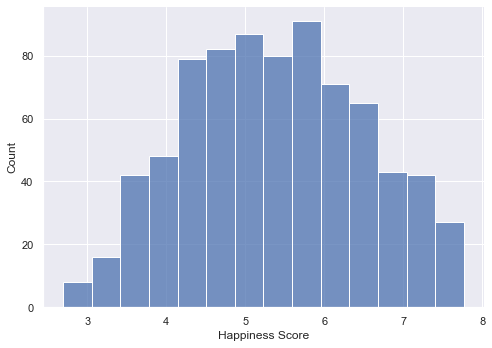

In [85]:
sns.displot(
  data=df_regionized,
  x="Happiness Score",
  kind="hist",
  aspect=1.4)

In [86]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import column
import numpy as np

output_notebook()

hist_plot = figure(title='Distribution Plot', tools='hover', tooltips=[('Count', '@top')], background_fill_color="#fafafa")
hist_plot.quad(top=np.histogram(df_regionized["Happiness Score"], bins=30)[0], bottom=0, left=np.histogram(df_regionized["Happiness Score"], bins=30)[1][:-1], right=np.histogram(df_regionized["Happiness Score"], bins=30)[1][1:], fill_color='navy', line_color='white', alpha=0.5)

# Show the plot
show(column(hist_plot))



Loading BokehJS ...

In [87]:
df_regionized["Region"] = np.where(df_regionized["Region"] == "Africa", "Africa", "world")



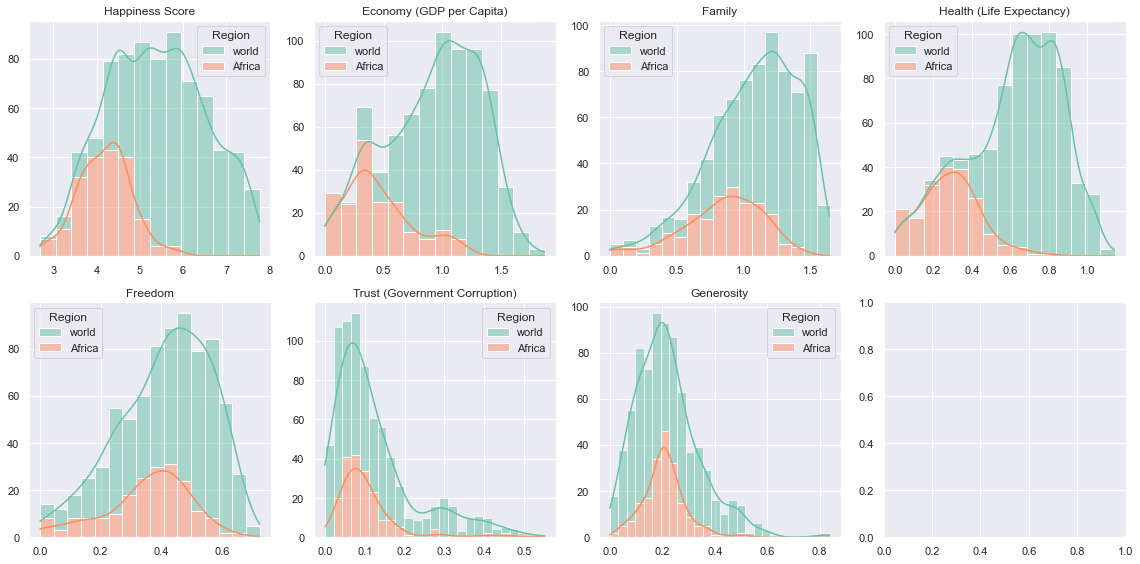

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the desired features
desired_features = ['Happiness Score', 'Economy (GDP per Capita)', 'Family',
                    'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                    'Generosity']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

colors = sns.color_palette('Set2', len(df_regionized['Region'].unique()))

for i, feature in enumerate(desired_features):
    row = i // 4
    col = i % 4
    ax = axes[row, col]
    sns.histplot(data=df_regionized, x=feature, hue='Region', multiple='stack', ax=ax, palette=colors,kde=True)
    ax.set_title(feature)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.tight_layout()

plt.show()


In [89]:
import plotly.graph_objects as go

df_regionized["Region_coded"] = df_regionized["Region"].apply(lambda x: 1 if x == "Africa" else 0)

years = df_regionized["year"].unique()

fig = go.Figure()

for year in years:
    df_year = df_regionized[df_regionized["year"] == year]
    # Add the scatter trace for the selected year to the figure
    fig.add_trace(go.Scatter(
        x=df_year["Economy (GDP per Capita)"],
        y=df_year["Happiness Score"],
        mode='markers',
        name=f"Happiness Score ({year})",
        marker=dict(
            size=5*df_regionized["Happiness Score"].values,
            line=dict(width=1),
            color=df_year["Region_coded"],  # Set color based on Region_coded column
            opacity=0.5,
            colorscale='Portland',
            showscale=True
        ),
        text=df_year["Region"].values
    ))

dropdown = []
for year in years:
    dropdown.append(dict(
        label=str(year),
        method='update',
        args=[{'visible': [y == year for y in years]}, {'title': f'Scatter plot of happiness score over GDP ({year})'}]
    ))

fig.update_layout(
    title="Scatter plot of happiness score",
    hovermode='closest',
    xaxis=dict(
        title="GDP per capita on a logarithmic scale",
        ticklen=5,
        zeroline=False,
        gridwidth=2,
    ),
    yaxis=dict(
        title="Happiness score",
        ticklen=5,
        gridwidth=2,
    ),
    showlegend=False,
    updatemenus=[dict(type='dropdown', active=0, buttons=dropdown)]
)

fig.write_html("happiness_score_over_gdp_in_African_nations.html")
fig.show()

In [90]:
df = pd.read_csv('MainData.csv')
df.head()

Unnamed: 0    Country  Happines Score  Social support  \
0           0      Libya           5.754           1.119   
1           1    Algeria           5.605           1.078   
2           2  Mauritius           5.477           0.985   
3           3    Nigeria           5.268           0.904   
4           4     Zambia           5.129           0.916   

   Health (Life Expectancy)  Trust (Government Corruption)  Generosity  \
0                     0.704                          0.110       0.183   
1                     0.618                          0.174       0.078   
2                     0.710                          0.075       0.377   
3                     0.160                          0.040       0.272   
4                     0.299                          0.125       0.196   

   Freedom  Economy (GDP per Capita)  year    Population  density    hpe  \
0    0.417                     1.131  2015   6192235.000    3.519    NaN   
1    0.286                     0.939  2015  39543154.000   16.603 42.000   
2    0.561                     1.008  2015   1262605.000  621.973 40.000   
3    0.343                     0.654  2015 183995785.000  202.022 38.000   
4    0.488                     0.470  2015  16248230.000   21.857 42.000   

   giniWB  
0     NaN  
1  27.600  
2  36.800  
3  35.100  
4  57.100

In [91]:
df.dtypes # Data types

Unnamed: 0                         int64
Country                           object
Happines Score                   float64
Social support                   float64
Health (Life Expectancy)         float64
Trust (Government Corruption)    float64
Generosity                       float64
Freedom                          float64
Economy (GDP per Capita)         float64
year                               int64
Population                       float64
density                          float64
hpe                              float64
giniWB                           float64
dtype: object

In [92]:
df.year.unique() # years

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [93]:
df.isnull().sum() # check null values

Unnamed: 0                        0
Country                           0
Happines Score                    0
Social support                    0
Health (Life Expectancy)          0
Trust (Government Corruption)     0
Generosity                        0
Freedom                           0
Economy (GDP per Capita)          0
year                              0
Population                        3
density                           3
hpe                              72
giniWB                            7
dtype: int64

In [94]:
df = pd.read_csv('world happines.csv')
df.shape

(768, 12)

In [95]:
df.head()

Country  Happiness Score  Economy (GDP per Capita)  Social support  \
0  Switzerland            7.587                     1.397           1.350   
1      Iceland            7.561                     1.302           1.402   
2      Denmark            7.527                     1.325           1.361   
3       Norway            7.522                     1.459           1.331   
4       Canada            7.427                     1.326           1.323   

   Health (Life Expectancy)  Life Expectancy_Years  Freedom  \
0                     0.941                 82.800    0.666   
1                     0.948                 82.400    0.629   
2                     0.875                 80.700    0.649   
3                     0.885                 82.300    0.670   
4                     0.906                 81.900    0.633   

   Trust (Government Corruption)  Generosity  year         Region  \
0                          0.420       0.297  2015         Europe   
1                          0.141       0.436  2015         Europe   
2                          0.484       0.341  2015         Europe   
3                          0.365       0.347  2015         Europe   
4                          0.330       0.458  2015  North America   

  Africa or non Africa  
0           Non_Africa  
1           Non_Africa  
2           Non_Africa  
3           Non_Africa  
4           Non_Africa

In [96]:
df['Africa or non Africa'].unique()

array(['Non_Africa', 'Africa'], dtype=object)

In [97]:
df.columns

Index(['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Social support', 'Health (Life Expectancy)', 'Life Expectancy_Years',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'year',
       'Region', 'Africa or non Africa'],
      dtype='object')

In [98]:
df_filter = df[['Country', 'Happiness Score', 'Economy (GDP per Capita)',
       'Social support', 'Life Expectancy_Years',
       'Freedom', 'Trust (Government Corruption)', 'Generosity', 'year',
       'Region', 'Africa or non Africa']]

In [99]:
df_africa= df_filter[(df_filter['Africa or non Africa'] == 'Africa') & (df_filter['year'] == 2019)]



df_non_africa= df_filter[(df_filter['Africa or non Africa'] == 'Non_Africa') & (df_filter['year'] == 2019)]

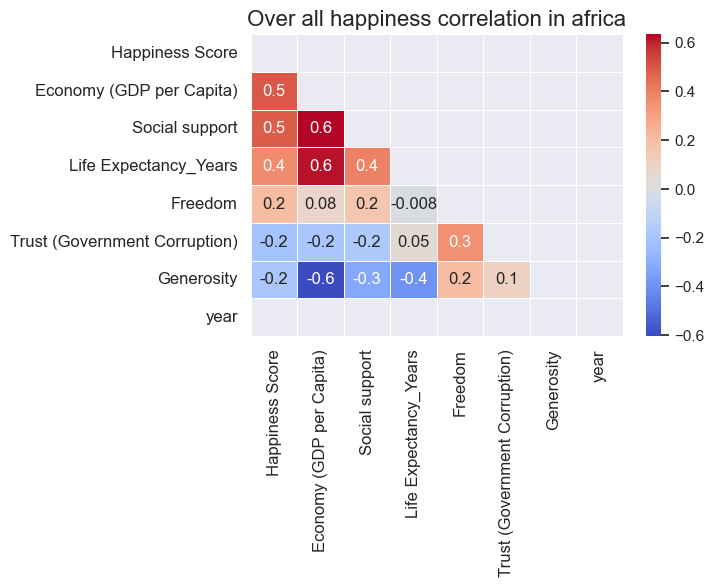

In [100]:
plt.figure(dpi=100)
plt.title('Over all happiness correlation in africa', fontsize=16)
cor = df_africa.corr()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

mask = np.zeros_like(cor,dtype=bool)
mask[np.triu_indices_from(mask)]=True
cor[mask]=np.nan

sns.heatmap(cor, annot=True, fmt='.1g',linewidth=.5,cmap="coolwarm",linecolor='white');

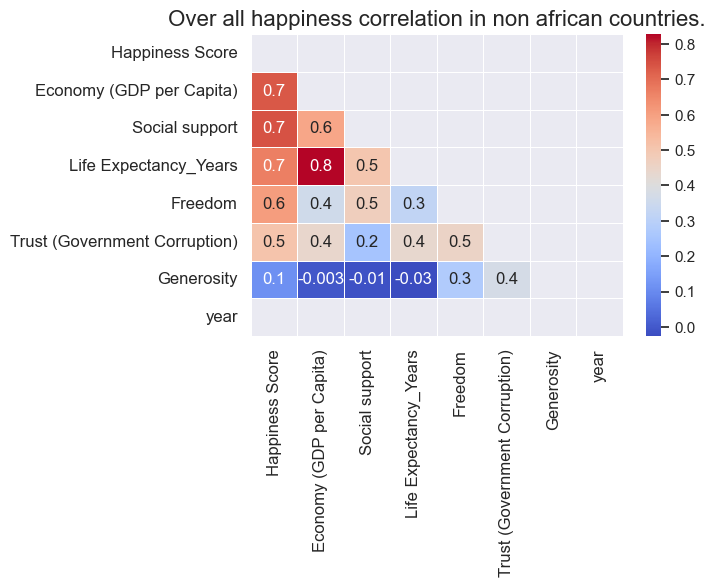

In [101]:
plt.figure(dpi=100)
plt.title('Over all happiness correlation in non african countries.', fontsize=16)
cor = df_non_africa.corr()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

mask = np.zeros_like(cor,dtype=bool)
mask[np.triu_indices_from(mask)]=True
cor[mask]=np.nan

sns.heatmap(cor, annot=True, fmt='.1g',linewidth=.5,cmap="coolwarm",linecolor='white');

# Happiness correlation of african and non african countries in each year.
* **plotly interactive plot.**


In [102]:
# Two menus, drop down.

'''' 
    References Used:
    
    1. show text on a heatmap with Plotly? 
    https://stackoverflow.com/questions/70512660/how-to-show-text-on-a-heatmap-with-plotly
    
    2. Plotly python facetted heatmaps
    https://stackoverflow.com/questions/72323583/plotly-python-facetted-heatmaps
    
    3. Correlation matrix in Plotly
    https://stackoverflow.com/questions/72195177/correlation-matrix-in-plotly
'''  

import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
df = pd.read_csv('world happines.csv') #read data
df_filter = df[['Country', 'Happiness Score', 'Economy (GDP per Capita)', #attributes used
                'Social support', 'Life Expectancy_Years',
                'Freedom', 'Trust (Government Corruption)', 'Generosity', 'year',
                'Region', 'Africa or non Africa']]

def create_heatmap(df_year): #Heatmap style and text size, 
    cor = df_year.corr()
    mask = np.zeros_like(cor, dtype=bool) #show cor. once in heatmap, apply diognal mask.
    mask[np.triu_indices_from(mask)] = True
    cor[mask] = np.nan # dont show nan valules. 
    cor_text = cor.round(2).astype(str).replace('nan', '') # Prepare correlation values as text
    trace = go.Heatmap(
        z=cor,x=cor.columns,y=cor.columns,colorscale='RdBu', #coolwarm style reciprocal
        showscale=True,zmin=-1,zmax=1,)
    
    annotations = []
    for i, row in enumerate(cor_text.index): #insert correlation values in in each box
        for j, col in enumerate(cor_text.columns):
            annotations.append(go.layout.Annotation(text=cor_text.iloc[i, j],x=col,y=row,
                    xref='x1',yref='y1',showarrow=False,font=dict(size=16)))
    return trace, annotations

years = list(range(2015, 2020)) #boht drop downs options 
# Ref: https://www.geeksforgeeks.org/how-to-make-dropdown-menus-in-plotly/
regions = ['Africa', 'Non_Africa']
traces = []
annotations = []
for j, year in enumerate(years):
    for k, region in enumerate(regions):
        df_filtered = df_filter[(df_filter['Africa or non Africa'] == region) & (df_filter['year'] == year)]
        trace, year_annotations = create_heatmap(df_filtered)
        traces.append(trace)
        annotations.append(year_annotations)
buttons_year = [ #drop down one
    dict(args=[{'visible': [True if i == (j * len(regions) + k) else False for k in range(len(regions)) for i in range(len(years) * len(regions))]}, {'annotations': annotations[j * len(regions)]}],
        label=f'{year}',method='update') 
    for j, year in enumerate(years)]

buttons_region = [ #Drop down 2
    dict(args=[{'visible': [True if i == (k * len(years) + j) else False for j in range(len(years)) for i in range(len(years) * len(regions))]}, {'annotations': annotations[k * len(years)]}],
        label=f'{region}',method='update') 
    for k, region in enumerate(regions)]

updatemenus = list([ #Dropdown 1 button location, size and other cosmatics
    dict(buttons=buttons_year,direction='down',pad={'r': 10, 't': 10},showactive=True,
        x=0.9,xanchor='left',y=1.0,yanchor='top',bgcolor='lightblue',font=dict(size=23)),
    dict(buttons=buttons_region, ##Dropdown 1 button location, size and other cosmatics
        direction='down',pad={'r': 10, 't': 10},showactive=True,x=0.9,
        xanchor='left',y=0.95,yanchor='top',bgcolor='lightblue',font=dict(size=23)),])
layout = go.Layout( #layout
    title='African and non african Countries Correlation Heatmap (2014-2019)',
    updatemenus=updatemenus,autosize=True,annotations=annotations[0])
fig = go.Figure(data=traces, layout=layout)
fig.update_layout(template='plotly_white')  # Set template to plotly_white fro white background
pyo.plot(fig, filename='non_african_heatmap.html') #final HTML file.


'non_african_heatmap.html'

> **Below is screenshot of interactive plot generated by above code. where user can select year and african/non african counties from drop down menu to explore correlation values.**
![Alt Text](https://i.imgur.com/lpatsTC.jpg)

# Happiness Score and GDP per Capital.
> From our inital analysis we have observed that GDP has highest corelation with happiness score in africa lets lets visualise GDP impact on happines in different years in Africa.

> **Lets make some plots other interactive plotly plots for magazine style report.**

In [ ]:
import plotly.offline as pyo

pyo.plot(fig, filename='happiness_vs_gdp_per_capita.html', auto_open=False)

> **Below is screenshot of interactive plot generated by above code. where user can select year to explore scatter plot.**
![Alt Text](https://i.imgur.com/ZpwZtYN.jpeg)

# Unsupervised learning to identify some patterns.
We want to see if there are any similar trends in the data for Africa and Europe. We've noticed that in Africa, countries with higher GDP tend to be happier. We're not sure if this is the same for the happiest countries (like scandinavian countries). To find out, we're going to look at the data for both Europe and Africa. We're going to use a technique called unsupervised learning (K-means algo) to spot different patterns or clusters. This will help us understand what factors might influence happiness for different type of countries.

In [103]:
# Import necessary libraries
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import renders as rs
%matplotlib inline
sns.set(style="whitegrid")
import plotly.graph_objs as go
import plotly.offline as pyo

import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('world happines.csv')

df = df[df['Africa or non Africa']=='Africa'] #only africa
good_data = df[['Happiness Score',
 'Economy (GDP per Capita)','Social support','Health (Life Expectancy)','Freedom',
 'Trust (Government Corruption)','Generosity',]]
good_data.head()

Happiness Score  Economy (GDP per Capita)  Social support  \
62            5.754                     1.131           1.119   
67            5.605                     0.939           1.078   
69            5.477                     1.008           0.985   
76            5.268                     0.654           0.904   
83            5.129                     0.470           0.916   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
62                     0.704    0.417                          0.110   
67                     0.618    0.286                          0.174   
69                     0.710    0.561                          0.075   
76                     0.160    0.343                          0.040   
83                     0.299    0.488                          0.125   

    Generosity  
62       0.183  
67       0.078  
69       0.377  
76       0.272  
83       0.196

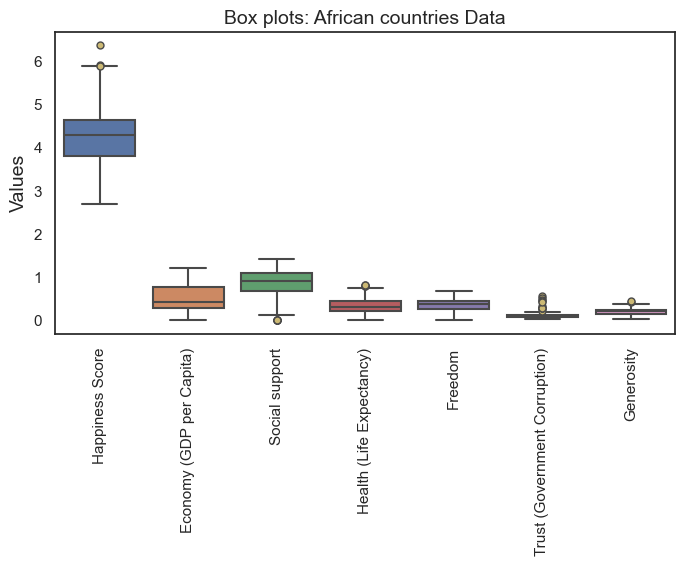

In [105]:
# check outliers 
sns.set(style="white")

fig = plt.figure(figsize=(8,4), dpi=100)
sns.boxplot(data= good_data,flierprops={"marker": "o", 'markerfacecolor': 'y'})

plt.xticks(rotation=90);
plt.ylabel('Values', fontsize=14);
plt.title('Box plots: African countries Data', fontsize=14);

#looks fine !!

In [106]:
from sklearn.decomposition import PCA
pca_ = PCA(n_components=7) # max components
pca_.fit(good_data)

PCA(n_components=7)

In [107]:
import renders as rs
pca_results = rs.pca_results(good_data, pca_)
pca_results

Explained Variance  Happiness Score  Economy (GDP per Capita)  \
Dimension 1               0.721            0.918                     0.300   
Dimension 2               0.128            0.387                    -0.662   
Dimension 3               0.081           -0.040                     0.579   
Dimension 4               0.032           -0.053                    -0.282   
Dimension 5               0.027            0.055                    -0.185   
Dimension 6               0.007            0.021                    -0.045   
Dimension 7               0.005           -0.004                     0.146   

             Social support  Health (Life Expectancy)  Freedom  \
Dimension 1           0.224                     0.121    0.041   
Dimension 2          -0.605                    -0.167    0.067   
Dimension 3          -0.760                     0.264   -0.063   
Dimension 4           0.071                     0.904    0.264   
Dimension 5           0.038                     0.246   -0.929   
Dimension 6           0.007                    -0.095   -0.077   
Dimension 7          -0.002                    -0.024   -0.225   

             Trust (Government Corruption)  Generosity  
Dimension 1                         -0.011      -0.028  
Dimension 2                          0.031       0.116  
Dimension 3                         -0.015      -0.110  
Dimension 4                          0.152       0.047  
Dimension 5                         -0.156      -0.113  
Dimension 6                          0.797      -0.590  
Dimension 7                          0.563       0.782

In [108]:
#cumulative explained variance
cumsum_pca_results= np.cumsum(pca_.explained_variance_ratio_)
cumsum_pca_results

array([0.72065626, 0.84825564, 0.92871139, 0.9603323 , 0.98735182,
       0.99470737, 1.        ])

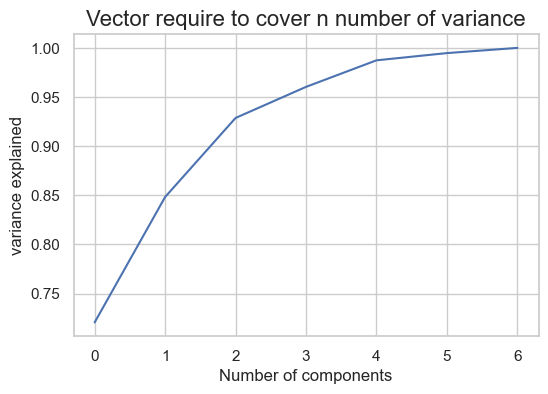

In [109]:
sns.set(style="whitegrid")
plt.figure(dpi=100)
expl=pca_.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);
plt.title('Vector require to cover n number of variance', fontsize=16);
plt.ylabel('variance explained');
plt.xlabel('Number of components');
sns.set(style="white")

Variance covered by the first and second principal component = 84%
 or 
Variance covered by the first four principal component = 96% Based on the plot, it appears that the marginal increase in explained variance levels off at around 3 components. Therefore, we could select 4 components

In [110]:
#Transform the good data using the PCA fit above
pca = PCA(n_components=4)
reduced_data = pca.fit(good_data)

reduced_data = pd.DataFrame(pca.transform(good_data), columns= ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Dimension 4'])
reduced_data.head()

Dimension 1  Dimension 2  Dimension 3  Dimension 4
0        1.645       -0.066        0.198        0.121
1        1.427        0.024        0.119        0.073
2        1.325        0.020        0.210        0.209
3        0.937        0.285       -0.044       -0.251
4        0.780        0.326       -0.119       -0.018

# Implementation: Creating Clusters

**Apply PCA by fitting the good data with the same number of dimensions as features.**

In [111]:
from sklearn.cluster import KMeans #apply k means
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    score = silhouette_score(reduced_data, kmeans.labels_)
    scores.append(score)
    print(f"For K = {k}, Silhouette Score = {score}")

For K = 2, Silhouette Score = 0.3512744482307908
For K = 3, Silhouette Score = 0.3294484049711234
For K = 4, Silhouette Score = 0.25785779129904124
For K = 5, Silhouette Score = 0.29443528048859585
For K = 6, Silhouette Score = 0.297955977120433
For K = 7, Silhouette Score = 0.3018448412749204
For K = 8, Silhouette Score = 0.29982868590190836
For K = 9, Silhouette Score = 0.3000911034910928
For K = 10, Silhouette Score = 0.2750073556114643
For K = 11, Silhouette Score = 0.2725342372245888
For K = 12, Silhouette Score = 0.25556121438502477
For K = 13, Silhouette Score = 0.2761481096604655
For K = 14, Silhouette Score = 0.2681031605557803


Assist k means algorithm to check if it works fine

Text(0.5, 1.0, 'Silhouette Score aginst K clusters')

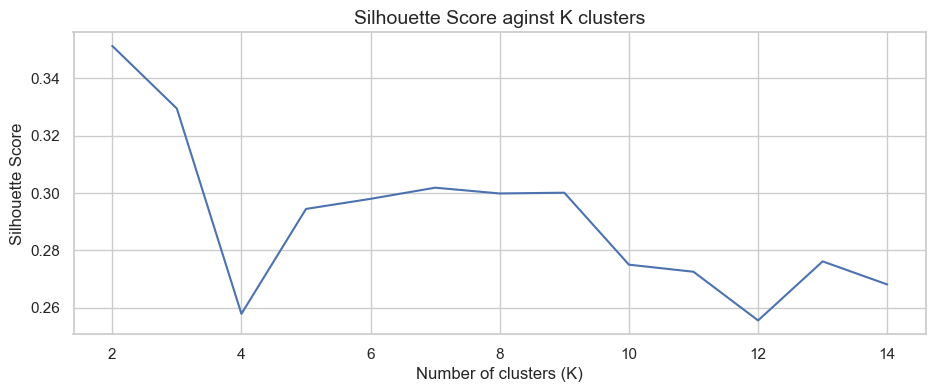

In [112]:
plt.figure(dpi=100,figsize=(11,4))
sns.set(style="whitegrid")
plt.plot(range(2, 15), scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
#plt.yticks(np.arange(0.30, 0.52, 0.02))
plt.title('Silhouette Score aginst K clusters',fontsize=14)

In [113]:
# Apply Elbow Method for finding Optimal K
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_)

print(sse)

[143.0208283025686, 79.08783520323357, 55.95320178806352, 46.5260783060445, 39.27813250365738, 33.94357808973124, 30.11134354354118, 27.577205379095915, 25.490124066668535, 22.85912958662866, 21.359356846406474, 20.276191438192814, 19.102520822689954, 17.977383358725348]


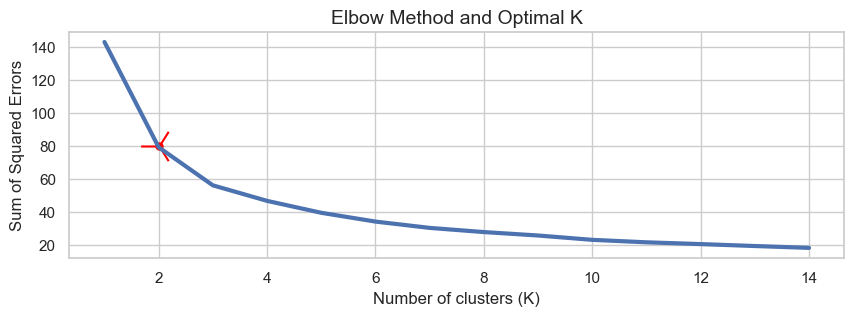

In [114]:
#add plot
plt.figure(dpi=100, figsize=(10,3));

plt.plot(range(1, 15), sse,  lw=3);
plt.scatter(2, 80, color='red', s=700, marker='3')
plt.scatter(2, 80, color='red', s=100, marker='.')

plt.xlabel('Number of clusters (K)');
plt.ylabel('Sum of Squared Errors');
#plt.xticks(np.arange(1,15,1));
#plt.yticks(np.arange(1500,4750,250));
plt.title('Elbow Method and Optimal K', fontsize=14);

In [115]:
# Elbow methid shows that two clusters are enough
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(reduced_data)

preds = kmean.labels_

### Implement Hierarchical(agglomerative) clustering using your choosen K

In [116]:
from sklearn.cluster import AgglomerativeClustering
a_cluster = AgglomerativeClustering(n_clusters=2)

preds_agg = a_cluster.fit_predict(reduced_data)

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced_data)

centers = kmeans.cluster_centers_
centers

array([[-0.55292337, -0.03956662,  0.00466069, -0.00185225],
       [ 0.54258836,  0.03882705, -0.00457357,  0.00181763]])

In [118]:
kmean.cluster_centers_

array([[ 0.54258836,  0.03882705, -0.00457357,  0.00181763],
       [-0.55292337, -0.03956662,  0.00466069, -0.00185225]])

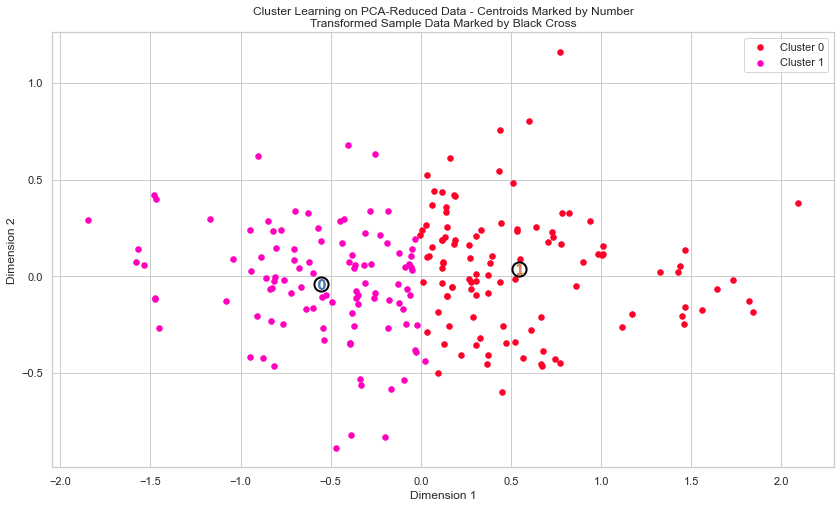

In [119]:
import renders as rs #py file !
rs.cluster_results(reduced_data, preds, centers)

In [120]:
df_pred=good_data.copy()
df_pred['pred'] = preds #from k mean algo

In [121]:
clustered_avg = df_pred.groupby('pred').mean().reset_index()
clustered_avg

pred  Happiness Score  Economy (GDP per Capita)  Social support  \
0     0            4.798                     0.638           0.954   
1     1            3.762                     0.367           0.750   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.389    0.374                          0.098   
1                     0.271    0.316                          0.107   

   Generosity  
0       0.179  
1       0.204

In [122]:
import chart_studio.plotly as py
import plotly.graph_objs as go

# for credentials
import configparser
config = configparser.ConfigParser()
config.read('config.ini') # for plotly Username and password, to not include it in code!

plotly_username = config['plotly']['username']
plotly_api_key = config['plotly']['api_key']

In [123]:
import chart_studio
chart_studio.tools.set_credentials_file(username=plotly_username, api_key= plotly_api_key)

In [124]:
# Write your code here
radar_data = [
    go.Scatterpolar(
      r = list(clustered_avg.loc[0,['Happiness Score', 'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]),
      theta = ['Happiness Score', 'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(clustered_avg.loc[1,['Happiness Score', 'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]),
      theta = ['Happiness Score', 'Economy (GDP per Capita)', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      fill = None,
      fillcolor=None,
      name = 'Cluster 1'
    )
]

In [125]:
# Write your code here
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 5])), showlegend = True)

In [126]:
# add plot
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

> * **Below is snapshot of plot generated by above code, Our analysis using unsupervised learning shows us two patterns or clusters. In both clusters, freedom, health score, and social support are almost the same. However, the cluster with a higher average GDP is slightly happier than the one with a lower GDP per capita. Based on this, we might guess that in Africa, happiness is tied to basic needs like good food and decent housing. Once these needs are met, other factors become important for happiness.**
![Alt Text](https://i.imgur.com/bppgo3d.jpeg)  

# 4. Genre

We used magazine style genre to display visualisations while providing more storytelling through text descriptions

From Visual Narrative, we used tools such as Consistent Visual Platform, Feature Distinction and Continuity Editing. We decided to keep our website format and visualisations consistent for the users to easily follow along the story. We went deeper into analysting distinct features of the data to focus the user's attention on important features.

From Narrative Structure, we used tools such as Linear, Hover Highlighting/Details, Introductory Text and Summary. We wanted users to be able to explore the visualisations themselves by hovering over data points. This increases user engagement and helps them learn about the data more. We added text to introduce and summarise our story to give a clear direction to the user on where the story begins and what are the takeaways from our storytelling.


# 5. Visualizations

For the story we've chosen the simplest and most intuitive form of visuals to ensure that readers of all background could follow along and understand the message we're trying to get accross. 
The interactive folium map to let's the user get a geographical overview of which regions are the happiest and get a since of the distribution among the world.


We've also put emphasis on making the plots more "fun" to engage with, in terms of the colors added to make the observations more salient that otherwise might've not been so obvious to the reader at first glance. In addition some of the plots have some pointers and lines indicating where the average of the happiness in the world is to get a since of wish country stand below and above average in terms of their happiness.



# 6. Discussion

To start with we were very excited to work with this data-set as it sparked an interrest in our curiosity and we were looking forward to discover some "hidden" insights in the data, however given the data is derived from subjectives questionaire from individuals we admit that the data was quite hard to get insight about. 


But this conclusion can be said, happiness can objectified up to a certain threshhold, when the basics human needs are met, then everything above that threshhold is subjected to each individual and culture. Some improvments can be done to further explain the distribution of the scores across each region, to see whish values are most common. 

All in all, some of our group members we'll be working on this project later on and catch up where we left as a hobby project, since it we still belive there are many hidden insights left to be explored. Things that we would improve is searching for other datasets to find possible indicators that contribute to happiness in Africa. 


# 7. Contributions

Mervyn: Writing, data analysis, data aquisition,website.

SanaUllah : Machine learning (unsupervised clustering), data analysis, Interactive visualization.

Abrahim: Interactive visuals, data aquisition, data cleaning, writing, website.



# Reference

1. World Happiness Report. https://worldhappiness.report/
2. Egbekpalu, P, E. Socio-Cultural Basis of Happiness: African Existential Perspective. 2022. https://www.intechopen.com/chapters/83961
3. Mignamissi, DieudonnéandKuete, YselleFlora. WhatMakeAfricanHappy. 2022. https://mpra.ub.uni-muenchen.de/99016/1/MPRA_paper_99016.pdf

# Github link. 

[Final Notebook Github Link](https://github.com/Sanaullah-nahk/SocialData__Analysis_n_Visualization/blob/main/assignments/Final%20notebook_repo/final_notebook.ipynb)